In [137]:
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Bidirectional
from keras.models import load_model
from tqdm import trange

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('D:/my_repository/Time_series_analysis_lstm/forexPredictor/GOLD60.csv', sep=',')

In [43]:
df.columns = ['Date','Time','Open', 'High', 'Low', 'Close', 'Volume']

In [44]:
df['Date_Time'] = df['Date'] +' '+ df['Time']

In [65]:
df.to_csv('D:/my_repository/Time_series_analysis_lstm/forexPredictor/GOLD60_coladded.csv')

In [49]:
df 

,Date,Time,Open,High,Low,Close,Volume,Date_Time
0,2016.05.23,23:00,1249.34,1249.67,1248.60,1248.86,1253,2016.05.23 23:00
1,2016.05.24,01:00,1248.83,1250.04,1248.31,1249.73,1149,2016.05.24 01:00
2,2016.05.24,02:00,1249.71,1249.71,1248.44,1249.44,1432,2016.05.24 02:00
3,2016.05.24,03:00,1249.43,1252.09,1245.65,1248.26,4575,2016.05.24 03:00
4,2016.05.24,04:00,1248.25,1249.07,1246.63,1247.95,4660,2016.05.24 04:00
...,...,...,...,...,...,...,...,...
15197,2023.06.05,03:00,1949.30,1949.42,1945.58,1946.40,9406,2023.06.05 03:00
15198,2023.06.05,04:00,1946.39,1948.27,1945.67,1947.47,21640,2023.06.05 04:00
15199,2023.06.05,05:00,1947.45,1948.23,1943.89,1944.82,14289,2023.06.05 05:00
15200,2023.06.05,06:00,1944.83,1947.44,1944.24,1947.04,9693,2023.06.05 06:00


<Axes: >

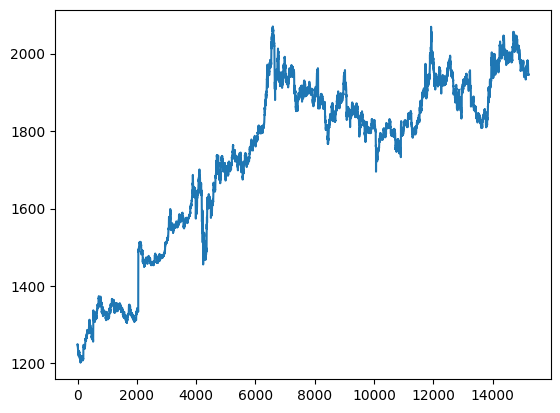

In [50]:
df.Close.plot()

In [61]:
df['Date'] = pd.to_datetime(df['Date_Time'])

In [62]:
df

,Date,Time,Open,High,Low,Close,Volume,Date_Time
0,2016-05-23 23:00:00,23:00,1249.34,1249.67,1248.60,1248.86,1253,2016.05.23 23:00
1,2016-05-24 01:00:00,01:00,1248.83,1250.04,1248.31,1249.73,1149,2016.05.24 01:00
2,2016-05-24 02:00:00,02:00,1249.71,1249.71,1248.44,1249.44,1432,2016.05.24 02:00
3,2016-05-24 03:00:00,03:00,1249.43,1252.09,1245.65,1248.26,4575,2016.05.24 03:00
4,2016-05-24 04:00:00,04:00,1248.25,1249.07,1246.63,1247.95,4660,2016.05.24 04:00
...,...,...,...,...,...,...,...,...
15197,2023-06-05 03:00:00,03:00,1949.30,1949.42,1945.58,1946.40,9406,2023.06.05 03:00
15198,2023-06-05 04:00:00,04:00,1946.39,1948.27,1945.67,1947.47,21640,2023.06.05 04:00
15199,2023-06-05 05:00:00,05:00,1947.45,1948.23,1943.89,1944.82,14289,2023.06.05 05:00
15200,2023-06-05 06:00:00,06:00,1944.83,1947.44,1944.24,1947.04,9693,2023.06.05 06:00


In [63]:
from stock_indicators import Quote

quotes_list = [
    Quote(d,o,h,l,c,v) 
    for d,o,h,l,c,v 
    in zip(df['Date'], df['Open'], df['High'], df['Low'], df['Close'], df['Volume'])
]

In [64]:
from stock_indicators import indicators
from stock_indicators import EndType     # Short path, version >= 0.8.1

# This method is NOT a part of the library.
quotes = quotes_list

# Calculate 3% change ZIGZAG
results = indicators.get_zig_zag(quotes, EndType.CLOSE, 3);

In [69]:
collect_date = []
collect_res = []
for i in results:
#     print(f"SMA on {r.date.date()} was ${r.sma or 0:.4f}")
#     collect_date.append(i.date.date())
    collect_res.append(i.zig_zag)
    

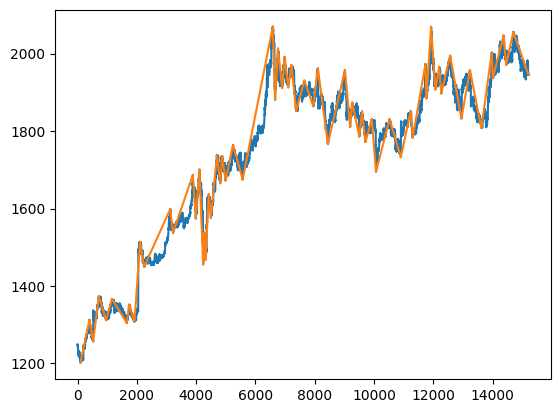

In [73]:
plt.plot(df.Close)
plt.plot(collect_res)
plt.show()

In [74]:
from stock_indicators.indicators.common.enums import MAType

In [102]:
# results = indicators.get_zig_zag(quotes, lookback_periods, percent_offset=2.5, ma_type=MAType.EMA);
results_env = indicators.get_ma_envelopes(quotes, 5, 1.5, MAType.TEMA);

In [103]:
collect_env_cen = []
collect_env_up = []
collect_env_low = []

for i in results_env:
#     print(f"SMA on {r.date.date()} was ${r.sma or 0:.4f}")
#     collect_date.append(i.date.date())
    collect_env_cen.append(i.center_line)
    collect_env_up.append(i.upper_envelope)
    collect_env_low.append(i.lower_envelope)

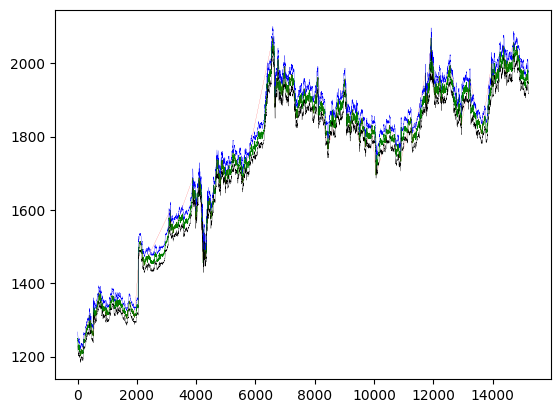

In [106]:
plt.plot(df.Close, linewidth=0.5, color='green')
plt.plot(collect_res, linewidth=0.1, color='red')
# plt.plot(collect_env_cen)
plt.plot(collect_env_up, linewidth=0.2, color='blue')
plt.plot(collect_env_low, linewidth=0.2, color='black')
plt.show()

In [111]:
new_df = pd.DataFrame(zip(df.Close, collect_res, collect_env_up, collect_env_low), 
                      columns=['Close', 'Zigzag', 'High', 'Low'])

In [114]:
new_df = new_df.astype('float')

<Axes: >

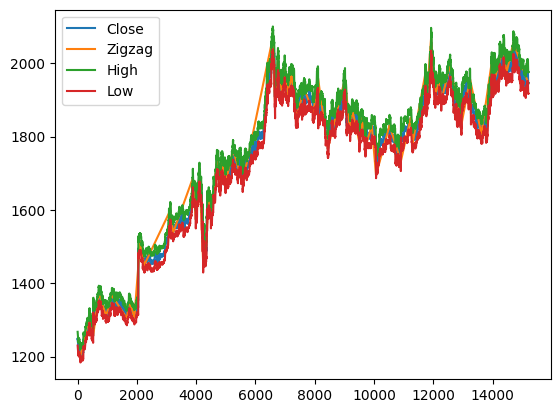

In [115]:
new_df.plot()

In [116]:
new_df.to_csv('D:/my_repository/Time_series_analysis_lstm/forexPredictor/GOLD60_indicator_applied.csv')

In [117]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [122]:
#dataset.drop('dma', axis=1, inplace=True)

#print("column number")
#print(dataset.columns,len(dataset.columns),len(dataset.index))

dt = new_df.values
d = dt.astype(float)

In [123]:
print("Checkinf for NaN and Inf")
print( "np.nan=", np.where(np.isnan(d)))
print( "is.inf=", np.where(np.isinf(d)))

Checkinf for NaN and Inf
np.nan= (array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98], dtype=int64), array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64))
is.inf= (array([], dtype=int64), array([], dtype=int64))


In [124]:
print("********************************************")
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(d)
d = imp.fit_transform(d)

********************************************


In [125]:
##print("values after encoding", values)
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(d)
##print("scaled values",scaled)
# specify the number of lag hours
n_hours = 15
n_features = len(new_df.columns)
n_ahead = 5
st = n_hours*n_features
# frame as supervised learning

In [126]:
reframed = series_to_supervised(scaled, n_hours, n_ahead)


In [127]:
print("column number")
print(reframed.columns,len(reframed.columns))

column number
Index(['var1(t-15)', 'var2(t-15)', 'var3(t-15)', 'var4(t-15)', 'var1(t-14)',
       'var2(t-14)', 'var3(t-14)', 'var4(t-14)', 'var1(t-13)', 'var2(t-13)',
       'var3(t-13)', 'var4(t-13)', 'var1(t-12)', 'var2(t-12)', 'var3(t-12)',
       'var4(t-12)', 'var1(t-11)', 'var2(t-11)', 'var3(t-11)', 'var4(t-11)',
       'var1(t-10)', 'var2(t-10)', 'var3(t-10)', 'var4(t-10)', 'var1(t-9)',
       'var2(t-9)', 'var3(t-9)', 'var4(t-9)', 'var1(t-8)', 'var2(t-8)',
       'var3(t-8)', 'var4(t-8)', 'var1(t-7)', 'var2(t-7)', 'var3(t-7)',
       'var4(t-7)', 'var1(t-6)', 'var2(t-6)', 'var3(t-6)', 'var4(t-6)',
       'var1(t-5)', 'var2(t-5)', 'var3(t-5)', 'var4(t-5)', 'var1(t-4)',
       'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var1(t-3)', 'var2(t-3)',
       'var3(t-3)', 'var4(t-3)', 'var1(t-2)', 'var2(t-2)', 'var3(t-2)',
       'var4(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var1(t+1)', 'var2(t+1)',
       'var3(t+1)', '

In [ ]:
## drop columns we don't want to predict
##deletedcol = list(reframed.columns)[st+n_ahead : -1] 

#deletedcol = (
#        list(reframed.columns)[st : -n_hours] 
#        ) 
#reframed.drop(deletedcol, axis=1, inplace=True)
#
#deletedcol = (
#        list(reframed.columns)[n_hours : st]
#        ) 
# 
#reframed.drop(deletedcol, axis=1, inplace=True)
####print("deleted column",deletedcol)
###reframed.drop(reframed.columns[[25,26,27,28,29,30,31, 33,34,35,36,37,38,39,41,42,43,44,45,46,47]], axis=1, inplace=True)
#
##print("remaining column number")
##print(reframed.columns,len(reframed.columns))
##print(reframed.head())

In [157]:
len(new_df)

15202

In [131]:
## split into train and test sets
values = reframed.values
train_size = int(len(values) * 0.8)
test_size = len(values) - train_size
train, test = values[0:train_size,:], values[train_size:len(new_df),:]
#
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))


(12146, 60) 12146 (12146,)


In [140]:
batchsize = 50
model = Sequential()

# design network
model.add(Bidirectional(LSTM(50,  activation='relu', input_shape=(n_hours, n_features), return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(20, activation='relu'))
model.add(Dense(n_ahead))
model.compile(loss='mae', optimizer='adam')

In [141]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=batchsize, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/50
243/243 - 4s - loss: 0.0416 - val_loss: 0.0212 - 4s/epoch - 16ms/step
Epoch 2/50
243/243 - 2s - loss: 0.0300 - val_loss: 0.0328 - 2s/epoch - 8ms/step
Epoch 3/50
243/243 - 2s - loss: 0.0272 - val_loss: 0.0281 - 2s/epoch - 8ms/step
Epoch 4/50
243/243 - 2s - loss: 0.0254 - val_loss: 0.0381 - 2s/epoch - 8ms/step
Epoch 5/50
243/243 - 2s - loss: 0.0283 - val_loss: 0.0541 - 2s/epoch - 8ms/step
Epoch 6/50
243/243 - 2s - loss: 0.0253 - val_loss: 0.0754 - 2s/epoch - 8ms/step
Epoch 7/50
243/243 - 2s - loss: 0.0262 - val_loss: 0.0785 - 2s/epoch - 8ms/step
Epoch 8/50
243/243 - 2s - loss: 0.0258 - val_loss: 0.0727 - 2s/epoch - 8ms/step
Epoch 9/50
243/243 - 2s - loss: 0.0236 - val_loss: 0.0719 - 2s/epoch - 8ms/step
Epoch 10/50
243/243 - 2s - loss: 0.0214 - val_loss: 0.0714 - 2s/epoch - 8ms/step
Epoch 11/50
243/243 - 2s - loss: 0.0220 - val_loss: 0.0696 - 2s/epoch - 8ms/step
Epoch 12/50
243/243 - 2s - loss: 0.0199 - val_loss: 0.0609 - 2s/epoch - 8ms/step
Epoch 13/50
243/243 - 2s - loss: 0.0

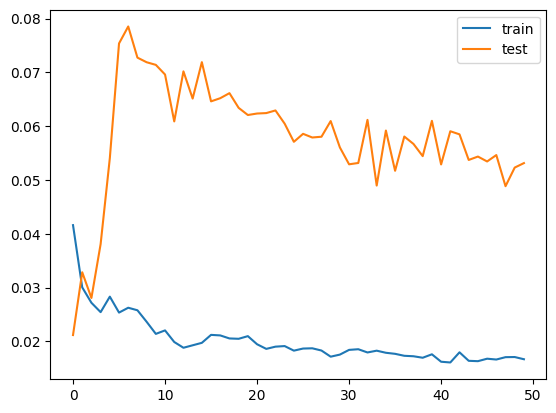

In [142]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [143]:
# evaluate the model
scores = model.evaluate(train_X, train_y, verbose=0)
print(model.metrics_names, scores*100)

['loss'] 6.9452740252017975


In [144]:
# make a prediction
trainPredict = model.predict(train_X)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_obs))
train_X = train_X.reshape((train_X.shape[0], n_obs))
#
print("yhat",yhat,yhat.shape,"test_X",test_X.shape,train_X.shape)


95/95 [==============================] - 0s 2ms/step
yhat [[0.8976474  0.8762743  0.9001867  0.892553   0.8967114 ]
 [0.89795804 0.8766492  0.9004603  0.8928242  0.8970118 ]
 [0.89832705 0.877039   0.9008447  0.8932114  0.8973988 ]
 ...
 [0.9098603  0.89106524 0.91280794 0.9064243  0.90998966]
 [0.90984166 0.89080864 0.91283095 0.9063815  0.90989393]
 [0.91004366 0.8908577  0.91305363 0.9065612  0.9100349 ]] (3037, 5) test_X (3037, 60) (12146, 60)


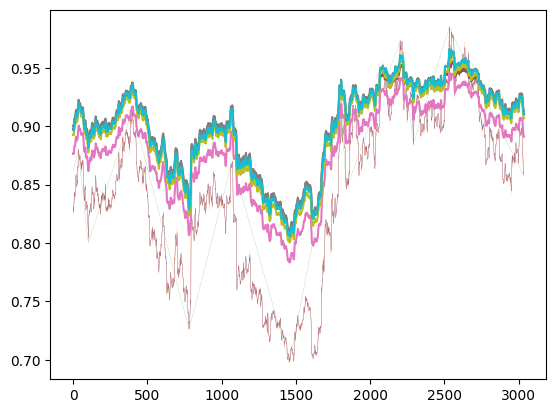

In [158]:
pyplot.plot(test_X[:,-n_ahead:], linewidth=0.1)
pyplot.plot(yhat)
#pyplot.show()

In [165]:
int(test_X.shape[1])/n_hours

4.0

In [166]:
## generate forecast predictions
test_X_new = test_X.reshape((test_X.shape[0], int(test_X.shape[1]/n_hours), n_hours))
print("testing forecast",test_X_new[-1::], test_X_new.shape)

testing forecast [[[0.89497338 0.86119546 0.89445372 0.89445372 0.89656365 0.86094447
   0.89627786 0.89627786 0.8943511  0.86069349 0.89553438 0.89553438
   0.89462767 0.8604425  0.89538463]
  [0.89538463 0.88521284 0.86019152 0.88869882 0.88869882 0.8754523
   0.85994053 0.87902293 0.87902293 0.87872502 0.85968955 0.87750736
   0.87750736 0.87523335 0.85943856]
  [0.87496207 0.87496207 0.86398626 0.85918758 0.86644417 0.86644417
   0.86361751 0.85893659 0.86304139 0.86304139 0.86258038 0.85868561
   0.86151861 0.86151861 0.85980318]
  [0.85843462 0.85952013 0.85952013 0.85922699 0.85818364 0.8587653
   0.8587653  0.86019498 0.85793265 0.85955619 0.85955619 0.8606905
   0.85768167 0.86056906 0.86056906]]] (3037, 4, 15)


In [150]:
def make_forecast(model: Sequential, look_back_buffer: np.ndarray, timesteps: int=1, batch_size: int=1):
    #forecast_predict = np.empty((0, 1,len(look_back_buffer)), dtype=np.float32)
    forecast_predict = np.empty((1,4), dtype=np.float32)
    forecast_predict[:, :] = np.nan
    print("forecast_predict and lookBbuffer", forecast_predict.shape,look_back_buffer.shape)
    
    for _ in trange(timesteps, desc='predicting data\t', mininterval=1.0):
        # make prediction with current lookback buffer
        #cur_predict = model.predict(look_back_buffer, batch_size)
        cur_predict = model.predict(look_back_buffer)
        #print("Current predict", cur_predict, cur_predict.shape)

        # add prediction to result
        forecast_predict = np.concatenate((forecast_predict, cur_predict))
        #print("forecast predict", forecast_predict, forecast_predict.shape)

        # deleted the oldest data from the input array
        look_back_buffer = np.delete(look_back_buffer, 0, axis=2)
        #print("look_back_buffer",look_back_buffer,look_back_buffer.shape)
        
        # reshapping the predicted output for concatenate with the input data                   
        cur_predict = cur_predict.reshape(4,1)
        #print("Current predict after reshape", cur_predict, cur_predict.shape)
        
        #look_back_buffer = np.dstack(look_back_buffer, cur_predict)
        look_back_buffer = look_back_buffer.reshape(look_back_buffer.shape[1],look_back_buffer.shape[2])
        #print("look_back_buffer after reshape 4 99",look_back_buffer.shape)
        look_back_buffer = np.c_[look_back_buffer, cur_predict]
        #print("look_back_buffer after adding",look_back_buffer,look_back_buffer.shape)
        look_back_buffer = look_back_buffer.reshape(1,look_back_buffer.shape[0],look_back_buffer.shape[1])
        #print("look_back_buffer after reshape 1 4 100",look_back_buffer,look_back_buffer.shape)
                
    return forecast_predict

In [168]:
test_X_new[-1::].shape

(1, 4, 15)

In [169]:
model.predict(test_X_new[-1::])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_5/bidirectional_1/backward_lstm_8/while/lstm_cell_12/MatMul' defined at (most recent call last):
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Teacher\AppData\Local\Temp\ipykernel_6180\3442142109.py", line 4, in <module>
      forecast_predict = make_forecast(model, test_X_new[-1::], timesteps=forecast_step, batch_size=batchsize)
    File "C:\Users\Teacher\AppData\Local\Temp\ipykernel_6180\129412230.py", line 10, in make_forecast
      cur_predict = model.predict(look_back_buffer)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\bidirectional.py", line 279, in __call__
      return super().__call__(inputs, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\bidirectional.py", line 409, in call
      y_rev = self.backward_layer(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\base_rnn.py", line 556, in __call__
      return super().__call__(inputs, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\lstm.py", line 625, in call
      last_output, outputs, states = backend.rnn(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\backend.py", line 5169, in rnn
      final_outputs = tf.compat.v1.while_loop(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\backend.py", line 5148, in _step
      output, new_states = step_function(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\lstm.py", line 623, in step
      return self.cell(inputs, states, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\lstm.py", line 327, in call
      z = backend.dot(inputs, self.kernel)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\backend.py", line 2464, in dot
      out = tf.matmul(x, y)
Node: 'sequential_5/bidirectional_1/backward_lstm_8/while/lstm_cell_12/MatMul'
Matrix size-incompatible: In[0]: [1,15], In[1]: [4,200]
	 [[{{node sequential_5/bidirectional_1/backward_lstm_8/while/lstm_cell_12/MatMul}}]] [Op:__inference_predict_function_77055]

In [151]:
batchsize = 50
forecast_step = 100

forecast_predict = make_forecast(model, test_X_new[-1::], timesteps=forecast_step, batch_size=batchsize)
print("forecast_predict",forecast_predict,forecast_predict.shape)
##
### shift test predictions for plotting
forecastPredictPlot = np.empty_like(yhat)
forecastPredictPlot[:, :] = np.nan
forecastplot = np.concatenate((forecastPredictPlot,forecast_predict))
#
pyplot.plot(forecastplot)
pyplot.show()
#
##nan_two = np.nan * np.ones(shape=(1,len(train_X[:,0])+len(test_X[:,0])))
##nan_one = nan_two.flatten()
##p1 = np.concatenate((nan_one,forecast_predict[:,n_ahead-n_ahead]), axis=0)


forecast_predict and lookBbuffer (1, 4) (1, 4, 15)


predicting data	:   0%|                                                                        | 0/100 [00:00<?, ?it/s]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_5/bidirectional_1/forward_lstm_8/while/lstm_cell_11/MatMul' defined at (most recent call last):
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Teacher\AppData\Local\Temp\ipykernel_6180\3442142109.py", line 4, in <module>
      forecast_predict = make_forecast(model, test_X_new[-1::], timesteps=forecast_step, batch_size=batchsize)
    File "C:\Users\Teacher\AppData\Local\Temp\ipykernel_6180\129412230.py", line 10, in make_forecast
      cur_predict = model.predict(look_back_buffer)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\bidirectional.py", line 279, in __call__
      return super().__call__(inputs, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\bidirectional.py", line 406, in call
      y = self.forward_layer(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\base_rnn.py", line 556, in __call__
      return super().__call__(inputs, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\lstm.py", line 625, in call
      last_output, outputs, states = backend.rnn(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\backend.py", line 5169, in rnn
      final_outputs = tf.compat.v1.while_loop(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\backend.py", line 5148, in _step
      output, new_states = step_function(
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\lstm.py", line 623, in step
      return self.cell(inputs, states, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\layers\rnn\lstm.py", line 327, in call
      z = backend.dot(inputs, self.kernel)
    File "D:\my_repository\Time_series_analysis_lstm\forex_predictor\lib\site-packages\keras\backend.py", line 2464, in dot
      out = tf.matmul(x, y)
Node: 'sequential_5/bidirectional_1/forward_lstm_8/while/lstm_cell_11/MatMul'
Matrix size-incompatible: In[0]: [1,15], In[1]: [4,200]
	 [[{{node sequential_5/bidirectional_1/forward_lstm_8/while/lstm_cell_11/MatMul}}]] [Op:__inference_predict_function_77055]